![](../img/banner_day2.png)

<br>

# 3일차 실습(2) - 파이토치로 선형 회귀 모델 구현하기

<br>
<br>
<div align='right'>강사 성민석</div>
<div align='right'>고려대학교 인공지능학과 박사과정</div>
<div align='right'>(minsuksung@korea.ac.kr)</div>

> <font color='red'><b>WARNING</b></font>: 본 컨텐츠는 **[저작권법 제25조 제2항](https://glaw.scourt.go.kr/wsjo/lawod/sjo192.do?contId=2135829&jomunNo=25)** 에 의해 강의 목적으로 이용한 저작물이 포함되어 있습니다.  
> 해당 자료를 제작자의 동의없이 <font color='red'><b>외부에 임의로 공개 및 수정하는 것을 금지</b></font>하며 이를 위반하는 경우 저작권 침해로서 관련법에 따라 처벌될 수 있으니 주의해주시기 바랍니다.

<h1>목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#데이터셋과-데이터로더-생성하기" data-toc-modified-id="데이터셋과-데이터로더-생성하기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터셋과 데이터로더 생성하기</a></span></li><li><span><a href="#신경망-모델-구성하기" data-toc-modified-id="신경망-모델-구성하기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>신경망 모델 구성하기</a></span></li><li><span><a href="#손실-함수-및-최적화-방법-설정" data-toc-modified-id="손실-함수-및-최적화-방법-설정-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>손실 함수 및 최적화 방법 설정</a></span></li><li><span><a href="#신경망-학습-및-평가하기" data-toc-modified-id="신경망-학습-및-평가하기-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>신경망 학습 및 평가하기</a></span></li><li><span><a href="#참고자료" data-toc-modified-id="참고자료-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>참고자료</a></span></li></ul></div>

![](../img/pipeline2.png)

## 데이터 불러오기
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [1]:
import torch

In [2]:
# 데이터 준비하기
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

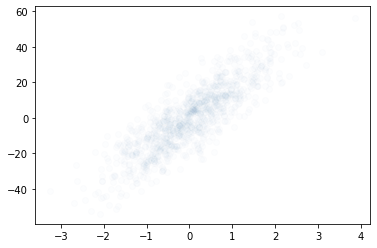

In [3]:
noise = 10
X,y, coef = make_regression(n_samples=1000, n_features=1,n_targets=1,noise=noise,coef=True, random_state=42)
plt.scatter(X,y,alpha=0.01)
plt.show()

## 데이터셋과 데이터로더 생성하기
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것입니다.

출처: [위키독스 PyTorch로 시작하는 딥러닝 입문](https://wikidocs.net/57165)

torch.utils.data.Dataset을 상속받아 직접 커스텀 데이터셋(Custom Dataset)을 만드는 경우도 있습니다. torch.utils.data.Dataset은 파이토치에서 데이터셋을 제공하는 추상 클래스입니다. Dataset을 상속받아 다음 메소드들을 오버라이드 하여 커스텀 데이터셋을 만들어보겠습니다.

커스텀 데이터셋을 만들 때, 일단 가장 기본적인 뼈대는 아래와 같습니다. 여기서 필요한 기본적인 define은 3개입니다.

```python
class CustomDataset(torch.utils.data.Dataset): 
    #  사실상 데이터셋의 전처리를 해주는 부분
    def __init__(self): 
        pass
    
    # # 데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분
    # len(dataset)을 했을 때 데이터셋의 크기를 리턴할 len
    def __len__(self): 
        pass

    # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
    # dataset[i]을 했을 때 i번째 샘플을 가져오도록 하는 인덱싱을 위한 get_item
    def __getitem__(self, idx): 
        pass
```

![](https://hulk89.github.io/resources/pytorch_dataloader.png)

dataset은 index로 data를 가져오도록 설계되었기 때문에, shuffle을 하기 위해서 index를 적절히 섞어주면 된다. 그 것을 구현한 것이 Sampler이다.

매 step마다 다음 index를 yield하면 됨. `__len__`과 `__iter__`를 구현하면 된다. RandomSampler로 각 data를 random하게 가져오며, batch_size를 4로 해보았다

```python
point_sampler = RandomSampler(map_dataset)
dataloader = torch.utils.data.DataLoader(map_dataset,
                                         batch_size=4,
                                         sampler=point_sampler)
for data in dataloader:
    print(data['input'].shape, data['label'])
```

사실 이 부분은 잘 몰라도 된다. 일단 모르면 생략해도 된다.

출처: https://hulk89.github.io/pytorch/2019/09/30/pytorch_dataset/

In [4]:
from torch.utils.data import Dataset, DataLoader

# 데이터셋, 데이터로더 생성하기
class MyDataset(Dataset):
    def __init__(self, n_samples=1000, n_features=1, n_targets=1, noise=1):
        X, y, coef = make_regression(
            n_samples=n_samples,
            n_features=n_features,
            n_targets=n_targets,
            noise=noise,
            coef=True,
            random_state=42)
        self.X, self.y = torch.Tensor(X), torch.Tensor(
            y.reshape(n_samples, 1))  # 차원 고려잘해야함
        self.coef = coef

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        _x = torch.FloatTensor(self.X[idx])
        _y = torch.FloatTensor(self.y[idx])
        return _x, _y

    def get_coef(self):
        return self.coef

In [5]:
my_dataset = MyDataset()
my_dataloader = DataLoader(my_dataset,batch_size=8)    

## 신경망 모델 구성하기
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

위의 데이터를 $ y = wx + b $와 같이 Linear 관계로 표현해보자.

In [6]:
import torch.nn as nn

# 모델 구성하기
class LinearNet(nn.Module):
    def __init__(self, nIn=1, nOut=1):
        super(LinearNet, self).__init__()
        self.layer = nn.Linear(nIn, nOut, bias=True)

    def forward(self, x):
        output = self.layer(x)
        return output

In [7]:
model = LinearNet(nIn=1,nOut=1)
model

LinearNet(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

In [8]:
# 학습 전 파라미터 확인
print("Parameters before learning: ",[p.data.item() for p in model.parameters()])

Parameters before learning:  [-0.427670955657959, 0.8894524574279785]


In [9]:
# 전체 학습 파라미터 확인
total_params = sum(p.numel() for p in model.parameters())
print("Num of Parameters : ",total_params)

Num of Parameters :  2


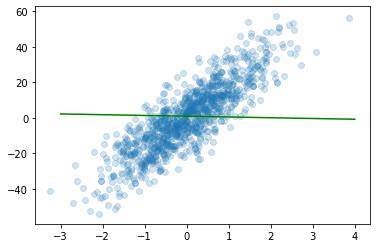

In [10]:
import matplotlib.pyplot as plt

# 학습 전 확인
plt.scatter(X,y,alpha=0.2)
x_sample = range(-3,5)
zero_bias = model(torch.Tensor([0])).item()
y_before_sample = [model(torch.Tensor([x])).item() for x in x_sample]
plt.plot(x_sample,y_before_sample,c='g')
plt.show()

## 손실 함수 및 최적화 방법 설정
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [11]:
loss_fn = nn.MSELoss() # 손실함수 설정하기

In [12]:
from torch import optim
optimizer = optim.SGD(model.parameters(),lr=1e-3) # 옵티마이저 설정하기

## 신경망 학습 및 평가하기
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [13]:
epochs = 10
y_pred_samples = []

for i in range(epochs):
    model.train()
    
    for batch_idx,(batch_X,batch_y) in enumerate(my_dataloader):
        optimizer.zero_grad() # 학습할 때는 매번 그래디언트를 0으로 초기화
        y_pred = model(batch_X)
        loss = loss_fn(batch_y,y_pred)
        loss.backward() # 오차를 역전파하여 계산함
        optimizer.step() # 역전파 계산한 값으로 가중치를 수정
        if batch_idx % 50 == 0:
            print(f'Epoch {i+1:>3}/{epochs} Batch {batch_idx:>3}/{len(my_dataloader)} Loss : {loss:>4.5f}')
            
    y_pred_samples.append([model(torch.Tensor([x])).item() for x in x_sample])
    print('-'*60)

Epoch   1/10 Batch   0/125 Loss : 251.50166
Epoch   1/10 Batch  50/125 Loss : 269.32483
Epoch   1/10 Batch 100/125 Loss : 158.47908
------------------------------------------------------------
Epoch   2/10 Batch   0/125 Loss : 157.21669
Epoch   2/10 Batch  50/125 Loss : 167.69431
Epoch   2/10 Batch 100/125 Loss : 97.04749
------------------------------------------------------------
Epoch   3/10 Batch   0/125 Loss : 98.71468
Epoch   3/10 Batch  50/125 Loss : 104.64624
Epoch   3/10 Batch 100/125 Loss : 59.36771
------------------------------------------------------------
Epoch   4/10 Batch   0/125 Loss : 62.37021
Epoch   4/10 Batch  50/125 Loss : 65.51528
Epoch   4/10 Batch 100/125 Loss : 36.29930
------------------------------------------------------------
Epoch   5/10 Batch   0/125 Loss : 39.75636
Epoch   5/10 Batch  50/125 Loss : 41.21488
Epoch   5/10 Batch 100/125 Loss : 22.21092
------------------------------------------------------------
Epoch   6/10 Batch   0/125 Loss : 25.65903
E

In [14]:
# 학습 후 파라미터 확인
print("Parameters after learning: ",[p.data.item() for p in model.parameters()])

Parameters after learning:  [15.173568725585938, 0.15157876908779144]


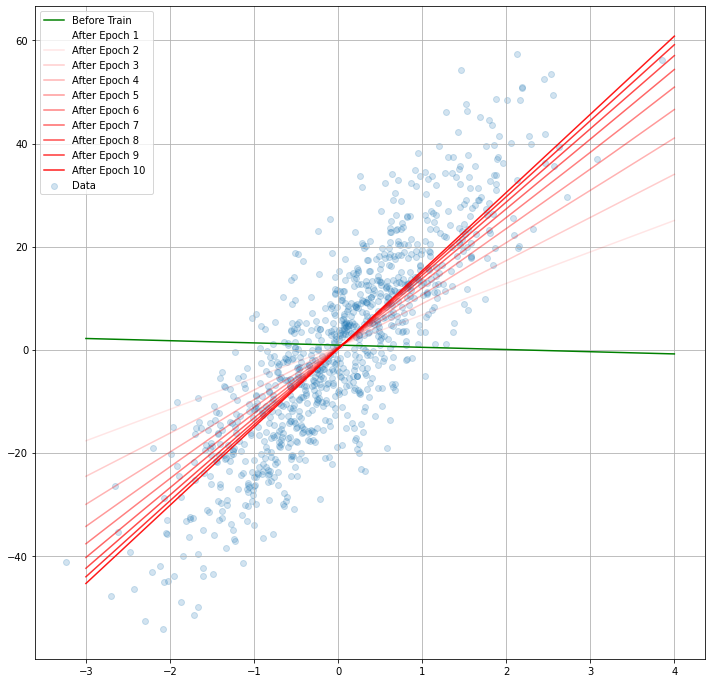

In [15]:
# 학습 후 확인
plt.figure(figsize=(12,12))
plt.scatter(X,y,alpha=0.2,label='Data')
plt.plot(x_sample, y_before_sample,color='g',label='Before Train')
for n,y_after_sample in enumerate(y_pred_samples):
    plt.plot(x_sample, y_after_sample,color='r',alpha=0.1*n,label=f'After Epoch {n+1} ')
plt.legend()
plt.grid(True)
plt.show()

## 참고자료
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

- ㅇㅇ

<br>

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 모든 자료의 저작권은 성민석에 있으며 제작자의 동의없이 외부로의 무단 복제, 배포 및 전송을 절대로 불허합니다.

<b>Copyright ⓒ 2022. Minsuk Sung. All rights reserved.</b>
</span>

<br>